### 선형모델
* 선형방정식으로 표현
* 하이퍼 파라미터가 없다.
    * 모델 파라미터가 존재
* 특성이 하나 - 직선
    * y = w1 * x1 + b
* 특성이 두개 - 평면
    * y  w1 * x1 + w2 * x2 + b
* 특성이 세개 이성 - 초평면

* sklearn.linear_model: 선형회귀, Ridge, Lasso
* sklearn.neighbors: knn 모델
* sklearn.ensemble: 앙상블 모델
* sklearn.svc: 많이 쓰이는 모델은 아니다.
* sklearn.tree: 의사결정트리

* import xgboost
* import lightgbm

In [7]:
import matplotlib.pyplot as plt
import mglearn

* 의사결정트리

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

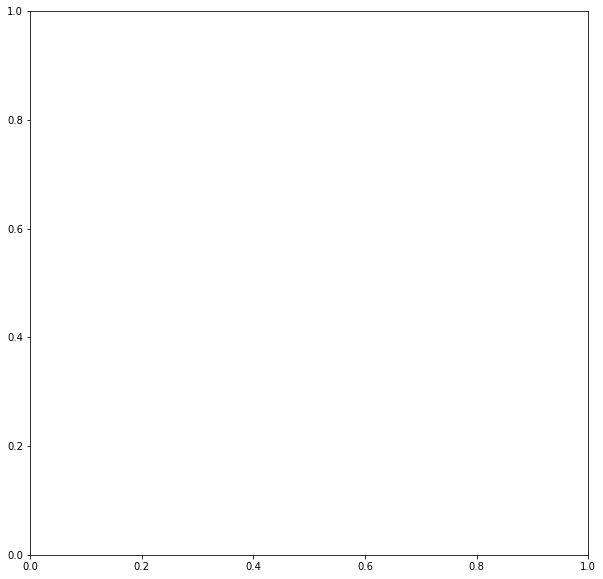

In [8]:
plt.figure(figsize=(10, 10))
mglearn.plots.plot_animal_tree()

* n개를 가장 적절하게 나눌수 있는 변수와 값은 무엇인가? (gini, entropy)
* target값이 같은 값들이 모여있는가?

* 데이터의 학습을 통해 예측해주는 방법론 (의사결정트리)
* binary decision tree
* 가장 효율적인 학습법
* gini, entropy 조건기준에 따라서 분기한다.
* gini, entropy 가 0이 될때까지 분기한다. (base, 과적합 가능성 있음)
* 우리가 예측하는 값 (target)이 하나의 범주.
* depth 설정 가능 (--> 가지치기)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import seaborn as sns

In [10]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    stratify=cancer.target,
    test_size=0.3,
    random_state=77
)

In [11]:
tree = DecisionTreeClassifier(max_depth=2, random_state=0)
tree.fit(X_train, y_train)

print('train set acc: {:.3f}'.format(tree.score(X_train, y_train)))
print('test set acc: {:.3f}'.format(tree.score(X_test, y_test)))

train set acc: 0.972
test set acc: 0.912


In [12]:
for i in range(1, 7, 1):
    tree = DecisionTreeClassifier(max_depth=i, random_state=0)
    tree.fit(X_train, y_train)
    print(f'max_depth: {i}')
    print('train set acc: {:.3f}'.format(tree.score(X_train, y_train)))
    print('test set acc: {:.3f}'.format(tree.score(X_test, y_test)))

max_depth: 1
train set acc: 0.932
test set acc: 0.883
max_depth: 2
train set acc: 0.972
test set acc: 0.912
max_depth: 3
train set acc: 0.982
test set acc: 0.906
max_depth: 4
train set acc: 0.985
test set acc: 0.906
max_depth: 5
train set acc: 0.992
test set acc: 0.889
max_depth: 6
train set acc: 0.997
test set acc: 0.901


In [13]:
from sklearn.tree import export_graphviz
import graphviz

In [14]:
tree = DecisionTreeClassifier(max_depth=2, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [15]:
export_graphviz(
    tree, 
    out_file='tree.dot', 
    class_names=['악성', '양성'],
    feature_names=cancer.feature_names,
    impurity=False,     # gini 계수
    filled=True         # color
)

In [16]:
with open('tree.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH